# Análisis del comportamiento de los anuncios de Meta Ads de la Constructora Xiudad

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import kruskal

In [3]:
sns.set_theme(style="whitegrid")
plt.rcParams["font.size"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

## CONTEXTO

El dataset utilizado en este análisis proviene del portafolio de Meta Ads, donde se recopilan los registros de campañas digitales desarrolladas para el proyecto inmobiliario **YOY XPLORA**, lanzado en mayo de 2024 por la constructora.  

Este proyecto tiene como objetivo la comercialización de 640 lotes residenciales ubicados en Jamundí, y las campañas digitales representan la principal fuente de generación de clientes potenciales (leads).

El propósito del análisis es **evaluar el comportamiento de los datos de las campates**, con especial énfasis en la variable **"Resultados"**, la cual refleja el estado alcanzado por cada interacción (por ejemplo, lead generado, conversión a cliente, compra efectiva).eting**.

## DESCRIPCIÓN DE CAMPOS
0. Nombre de la campaña: Nombre asignado a la campaña en Meta , (Tipo de variable = Categórica )
1. Identificador de la campaña: ID único de la campaña, (Tipo de variable = Númerica)
2. Nombre del conjunto de anuncios: Nombre asignado al conjunto de anuncios de la campaña en Meta Ads, (Tipo de variable = Categórica)
3. Identificador del conjunto de anuncios: ID único del conjunto de anuncios, (Tipo de variable = Númerica)
4. Nombre del anuncio: Nombre asignado al anuncio en el conjunto de anuncios en Meta Ads, (Tipo de variable = Categórica)
5. Identificador del anuncio: ID único del anuncio, (Tipo de variable = Númerica)
6. Mes: Período de duración del conjunto de anuncios/anuncio, (Tipo de variable = Categórica)
7. Objetivo: Objetivo de la campaña (ventas, clientes potenciales, mensajes, etc), (Tipo de variable = Categórica)
8. Edad: Rango de edades con las cuales se segmentó el conjunto de anuncios, (Tipo de variable = Categórica)
9. Sexo: Segmento de género para cada conjunto de anuncios, (Tipo de variable = Categórica)
10. Llamada a la acción: Botón usado para motivar al usuario a realizar una acción, (Tipo de variable = Categórica)
11. Tipo de resultado: Tipo de conversión medida, (Tipo de variable = Categórica)
12. Resultados: Cantidad de conversiones logradas, (Tipo de variable = Númerica)
13. Importe gastado (COP): Monto invertido en campaña/conjunto de anuncios/anuncios, (Tipo de variable = Númerica)
14. Alcance: Personas únicas alcanzadas, (Tipo de variable = Númerica)
15. Impresiones: Número total de veces que se mostró un anuncio, (Tipo de variable = Númerica)
16. Costo por resultado: Costo promedio por conversión, (Tipo de variable = Númerica)
17. Clics en el enlace: Número de clic en el anuncio, (Tipo de variable = Númerica)
18. CPC (costo por clic en el enlace):Costo promedio por clic, (Tipo de variable = Númerica)
19. CPM (costo por mil impresiones): Costo promedio por mil impresiones, (Tipo de variable = Númerica)
20. CTR (todos): Porcentaje de clics sobre impresiones, (Tipo de variable = Númerica)
21. Conversaciones con mensajes iniciadas: Conversaciones de Whatsapp iniciadas, (Tipo de variable = Númerica)
22. Frecuencia: Promedio de veces que una persona vio el anuncio, (Tipo de variable = Númerica)
23. Inicio del informe: Fecha inicial del reporte, (Tipo de variable = Categórica)
24. Fin del informe: Fecha final del reporte, (Tipo de variable = Categórica)

## Análisis inicial del Dataset
Empezaremos viendo cómo está estructurado el dataset

In [4]:
df_meta = pd.read_csv('REPORTE-XPLORA-MAYO-2024-AGOSTO-2025.csv')
pd.set_option('display.max_columns', None)
df_meta.shape

(2220, 25)

In [5]:
df_meta.head()

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia,Inicio del informe,Fin del informe
0,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,55-64,male,WHATSAPP_MESSAGE,NaN,NaN,26,NaN,6,NaN,NaN,NaN,4333.333333,0.000000,NaN,NaN,2024-05-03,2024-05-31
1,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-06-01 - 2024-06-30,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,9581,NaN,794,NaN,5.0,1916.2,12066.750630,1.763224,NaN,NaN,2024-06-01,2024-06-30
2,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,25-34,male,WHATSAPP_MESSAGE,NaN,NaN,935,NaN,86,NaN,1.0,935.0,10872.093023,1.162791,NaN,NaN,2024-05-03,2024-05-31
3,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,35-44,male,WHATSAPP_MESSAGE,NaN,NaN,983,NaN,71,NaN,2.0,491.5,13845.070423,5.633803,NaN,NaN,2024-05-03,2024-05-31
4,Xiudad | MAYO | INTERACCIÓN - 13 MAYO 2024,120208939348690362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209021784370362,Xiudad | MAYO | INTERACCIÓN - PIEZA,120209056012500362,2024-05-03 - 2024-05-31,OUTCOME_ENGAGEMENT,45-54,male,WHATSAPP_MESSAGE,NaN,NaN,866,NaN,42,NaN,2.0,433.0,20619.047619,7.142857,NaN,NaN,2024-05-03,2024-05-31


## Información básica de cada columna
Se observa información básica sobre cada columna como índice, nombre, cantidad de no nulos, tipo de dato

In [6]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Nombre de la campaña                    2220 non-null   object 
 1   Identificador de la campaña             2220 non-null   int64  
 2   Nombre del conjunto de anuncios         2220 non-null   object 
 3   Identificador del conjunto de anuncios  2220 non-null   int64  
 4   Nombre del anuncio                      2220 non-null   object 
 5   Identificador del anuncio               2220 non-null   int64  
 6   Mes                                     2220 non-null   object 
 7   Objetivo                                2220 non-null   object 
 8   Edad                                    2220 non-null   object 
 9   Sexo                                    2220 non-null   object 
 10  Llamada a la acción                     2220 non-null   obje

Observamos algunas columnas que no tienen datos como Alcance, Conversaciones con mensajes iniciadas, Frecuencia
- La variable "Alcance" aparece vacía porque el alcance es justamente el "Resultado" cuando el objetivo de la campaña es de reconocimiento, por ende, esta columna se vuelve rendundante.
- La variable "Conversaciones con mensajes iniciadas" no tiene datos porque dentro de los registros no existe ninguno con objetivo de campaña de mensajes.
- La variable "Frecuencia" no tiene datos porque para calcularse esta, debe tener datos en la columna de Alcance, puesto que frecuencia se calcula como Impresiones/Alcance.

## Análisis estadístico inicial del dataset

In [7]:
df_meta.describe()

,Identificador de la campaña,Identificador del conjunto de anuncios,Identificador del anuncio,Resultados,Importe gastado (COP),Alcance,Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Conversaciones con mensajes iniciadas,Frecuencia
count,2.220000e+03,2.220000e+03,2.220000e+03,945.000000,2.220000e+03,0.0,2220.000000,945.000000,1610.000000,1610.000000,2.218000e+03,2218.000000,0.0,0.0
mean,1.202129e+17,1.202129e+17,1.202130e+17,3132.437037,5.321890e+04,NaN,8427.134234,8611.179909,87.513043,1250.976298,1.319606e+04,2.479121,NaN,NaN
std,2.850898e+12,2.844071e+12,2.869186e+12,10872.437242,1.384968e+05,NaN,22194.363144,10953.707613,278.117998,1191.727800,5.142396e+04,6.280554,NaN,NaN
min,1.202089e+17,1.202090e+17,1.202091e+17,1.000000,0.000000e+00,NaN,0.000000,0.000000,1.000000,11.000000,0.000000e+00,0.000000,NaN,NaN
25%,1.202108e+17,1.202108e+17,1.202108e+17,2.000000,5.457500e+02,NaN,60.000000,1267.500000,4.000000,550.141129,5.817939e+03,0.152860,NaN,NaN
50%,1.202128e+17,1.202128e+17,1.202130e+17,10.000000,6.385000e+03,NaN,593.500000,6134.000000,17.000000,1003.891304,9.466273e+03,1.479588,NaN,NaN
75%,1.202147e+17,1.202147e+17,1.202147e+17,81.000000,3.339200e+04,NaN,5261.000000,10896.666667,57.000000,1558.076230,1.446128e+04,2.990636,NaN,NaN
max,1.202253e+17,1.202253e+17,1.202253e+17,153713.000000,1.775294e+06,NaN,260652.000000,104150.000000,6729.000000,17947.000000,2.243375e+06,200.000000,NaN,NaN


Del análisis estadístico inicial (`df.describe()`) se observa que:

- Algunas columnas como los **identificadores de campaña, conjunto de anuncios e identificador del anuncio** aparecen en el resumen estadístico, pero no son variables útiles para el análisis exploratorio, ya que funcionan únicamente como llaves de identificación y no aportan información relevante desde el punto de vista descriptivo.  

- En las variables numéricas que sí aportan (ejemplo: `Resultados`, `Importe gastado (COP)`, `Impresiones`, `Clics en el enlace`, `CPC`, `CPM`, `CTR`), se evidencian **grandes diferencias entre los valores mínimos y máximos**, así como desviaciones estándar elevadas en relación con la media.  
  Esto indica que el dataset tiene **alta dispersión** y posiblemente **outliers**, lo cual será analizado más adelante.  

- Por ejemplo:  
  - `Resultados` varía entre 1 y 153.713.  
  - `Importe gastado` va desde 0 hasta más de 1,7 millones COP.  
  - `Impresiones` oscilan desde 0 hasta más de 260.000.  
  Estos rangos tan amplios sugieren comportamientos muy heterogéneos entre las distintas campañas.

Es importante resaltar que la gran variabilidad observada en las columnas numéricas se debe a que en este resumen estadístico se están incluyendo anuncios de **todos los objetivos de campaña**. Por ejemplo, en las campañas de Reconocimiento el objetivo es maximizar el alcance, por lo cual los resultados son naturalmente mucho más altos en comparación con campañas de generación de clientes potenciales, donde los números tienden a ser menores.  

Adicionalmente, muchos anuncios presentan valores bajos en la variable `Resultados` (1, 2, etc.), lo cual está relacionado con la dinámica de ejecución de campañas: se lanzan múltiples anuncios en fase de prueba y, tras un periodo de aprendizaje, solo permanecen activos aquellos que generan un desempeño favorable. Los anuncios con resultados insuficientes y costos por lead elevados suelen apagarse rápidamente, quedando registrados en el dataset con métricas bajas.  

Esto explica tanto la presencia de valores muy altos como de valores muy bajos en las diferentes métricas, y confirma que la dispersión en los datos no solo refleja outliers, sino también el comportamiento real y esperado de las campañas digitales.


### Se revisan los datos nulos por columna

In [8]:
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                         1275
Resultados                                1275
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                         610
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

Se puede observar que en la variable resultados hay muchos valores nulos, esto es debido a lo que se explicaba anteriormente con la dinámica de las campañas; sin embargo, meta al no obtener resultados de los anuncios deja el valor vacío, por esta misma razón lo que haremos será imputar el valor cero (0) a todos los valores nulos de la columna Resultados. De la misma manera, si los resultados son cero, el costo por resultado será cero.

Por otro lado, para la columna Tipo de resultados tenemos valores nulos porque Meta al detectar valores nulos, no tiene ningún objetivo que poner, sin embargo, estos valores nulos se pueden arreglar sencillamente, viendo cuál es el objetivo de la campaña del anuncio y así mismo poner un tipo de resultado.

In [9]:
df_meta.groupby('Objetivo')['Tipo de resultado'].value_counts(dropna = False)

Objetivo            Tipo de resultado           
LINK_CLICKS         Clics en el enlace               38
                    NaN                               4
OUTCOME_AWARENESS   Alcance                         194
                    NaN                              22
OUTCOME_ENGAGEMENT  NaN                             253
OUTCOME_LEADS       Clientes potenciales de Meta    713
                    NaN                             614
OUTCOME_SALES       NaN                             382
Name: count, dtype: int64

In [10]:
df_meta.loc[:,'Resultados'] = df_meta['Resultados'].fillna(0)
df_meta.loc[:,'Clics en el enlace'] = df_meta['Clics en el enlace'].fillna(0)

df_meta['Tipo de resultado'] = np.where(
    (df_meta['Objetivo'] == 'LINK_CLICKS') & (df_meta['Tipo de resultado'].isna()),
    'Clics en el enlace',
    np.where(
        (df_meta['Objetivo'] == 'OUTCOME_AWARENESS') & (df_meta['Tipo de resultado'].isna()),
        'Alcance',
        np.where(
            (df_meta['Objetivo'] == 'OUTCOME_LEADS') & (df_meta['Tipo de resultado'].isna()),
            'Clientes potenciales de Meta',
            np.where(
                (df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT') & (df_meta['Tipo de resultado'].isna()),
                'Interacciones',
                 np.where(
                     (df_meta['Objetivo'] == 'OUTCOME_SALES') & (df_meta['Tipo de resultado'].isna()),
                'Ventas',
                df_meta['Tipo de resultado']
                )
            ) 
        )
    )
)

In [11]:
df_meta.isnull().sum()

Nombre de la campaña                         0
Identificador de la campaña                  0
Nombre del conjunto de anuncios              0
Identificador del conjunto de anuncios       0
Nombre del anuncio                           0
Identificador del anuncio                    0
Mes                                          0
Objetivo                                     0
Edad                                         0
Sexo                                         0
Llamada a la acción                          0
Tipo de resultado                            0
Resultados                                   0
Importe gastado (COP)                        0
Alcance                                   2220
Impresiones                                  0
Costo por resultado                       1275
Clics en el enlace                           0
CPC (costo por clic en el enlace)          610
CPM (costo por mil impresiones)              2
CTR (todos)                                  2
Conversacione

## Filtro por objetivo de campaña

Primero revisar los valores que tiene la columna de Objetivo

In [12]:
df_meta['Objetivo'].unique()

array(['OUTCOME_ENGAGEMENT', 'OUTCOME_LEADS', 'OUTCOME_SALES',
       'OUTCOME_AWARENESS', 'LINK_CLICKS'], dtype=object)

In [13]:
df_meta['Objetivo'].value_counts()

Objetivo
OUTCOME_LEADS         1327
OUTCOME_SALES          382
OUTCOME_ENGAGEMENT     253
OUTCOME_AWARENESS      216
LINK_CLICKS             42
Name: count, dtype: int64

Una vez identificados estos valores, se generan los datasets filtrados, pero primero vamos a eliminar las 3 columnas que no tienen datos

In [14]:
df_meta = df_meta.drop(columns=['Alcance', 'Conversaciones con mensajes iniciadas','Frecuencia'], errors = 'ignore')

Creamos un dataset filtrado por objetivo de campaña y los guardamos en un diccionario para poder facilitar la creación de gráficas

In [15]:
df_interaccion = df_meta[df_meta['Objetivo'] == 'OUTCOME_ENGAGEMENT']
df_leads = df_meta[df_meta['Objetivo'] == 'OUTCOME_LEADS']
df_ventas = df_meta[df_meta['Objetivo'] == 'OUTCOME_SALES']
df_reconocimiento = df_meta[df_meta['Objetivo'] == 'OUTCOME_AWARENESS']
df_clics = df_meta[df_meta['Objetivo'] == 'LINK_CLICKS']
dfs = {
    'Interaccion': df_interaccion,
    'Clientes potenciales': df_leads,
    'Ventas': df_ventas,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clics
}

Creamos el histograma de la variable 'Resultados' para cada dataset filtrado

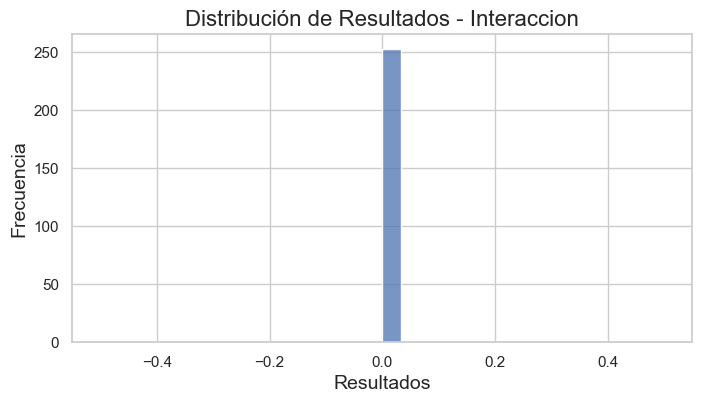

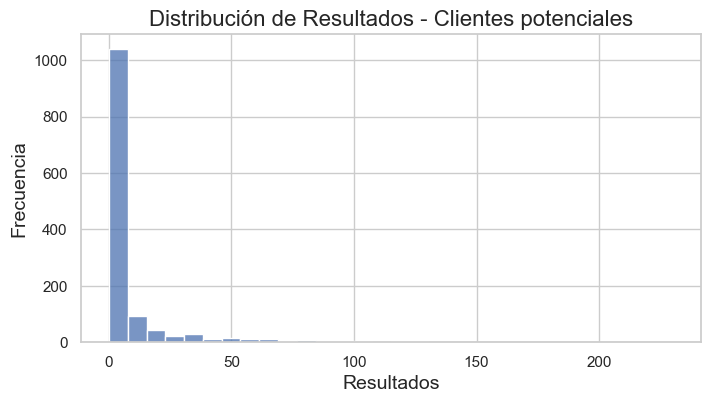

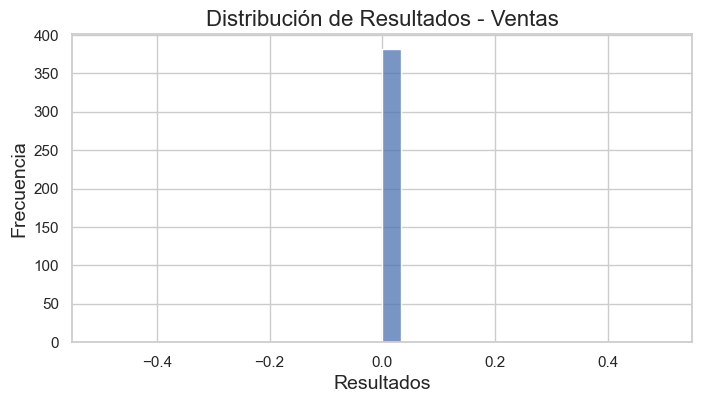

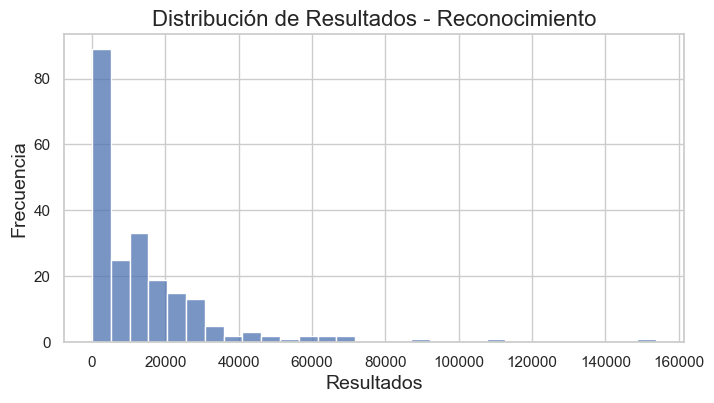

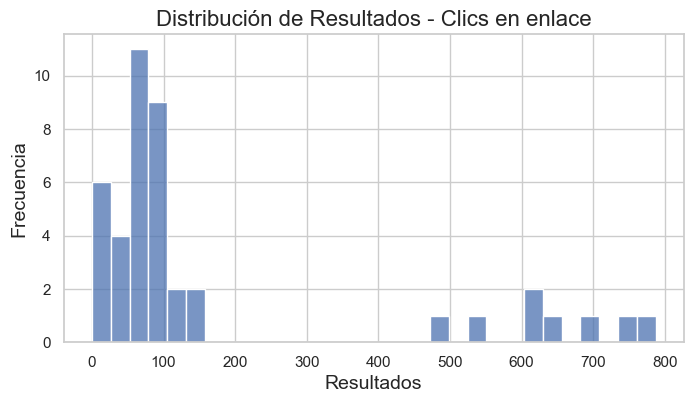

In [16]:
for objetivo, df in dfs.items():
    plt.figure(figsize=(8,4))
    sns.histplot(df['Resultados'], bins=30, kde=False)
    plt.title(f"Distribución de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.ylabel("Frecuencia")
    plt.show()
    

Al analizar la variable `Resultados` segmentada por objetivo de campaña, se observan diferentes patrones de distribución:

- **Clientes potenciales (OUTCOME_LEADS):**  
  La distribución es **sesgada positivamente (a la derecha)**, con la mayoría de anuncios generando entre 0 y 10 resultados.  
  Pocos anuncios alcanzan valores altos (cola larga hasta ~200).  
  Esto refleja la dinámica de campañas de prueba: se lanzan muchos anuncios, la mayoría rinde poco, y solo unos pocos concentran la mayor parte de las conversiones.

- **Reconocimiento (OUTCOME_AWARENESS):**  
  También presenta una **distribución sesgada positivamente**, pero con una **escala mucho mayor**.  
  Algunos anuncios superan los 150.000 resultados, lo que es coherente con el hecho de que estas campañas buscan maximizar **alcance e impresiones**.  
  Existe una gran dispersión entre anuncios, lo que indica variabilidad significativa en su rendimiento.

- **Clics en enlace (LINK_CLICKS):**  
  Aunque mantiene el sesgo positivo, la forma es distinta:  
  hay una **concentración de anuncios en un rango medio (50–150 clics)**, con algunos picos aislados de 500 a 800 clics.  
  Esto sugiere un comportamiento más homogéneo que en Leads o Reconocimiento, aunque todavía aparecen outliers.

- **Interacción (OUTCOME_ENGAGEMENT) y Ventas (OUTCOME_SALES):**  
  Los histogramas aparecen vacíos, evidenciando que **no existen resultados registrados en estas métricas**.  
  Aunque se mantienen en la exploración, no aportan información útil para el análisis.

Se crea un nuevo diccionario excluyendo los objetivos de Interacción y ventas. Posteriormente se generan los boxplots de la variable resultado

In [17]:
dfs1 = dfs = {
    'Clientes potenciales': df_leads,
    'Reconocimiento': df_reconocimiento,
    'Clics en enlace': df_clics
}

Las 3 primeras columnas no las podemos analizar puesto que son ID's, por otro lado, los valores de resultados pueden ser bastante variables dependiendo del objetivo de la campaña al igual que el costo por resultado puede variar bastante dependiendo de si el anuncio trae bastantes resultados

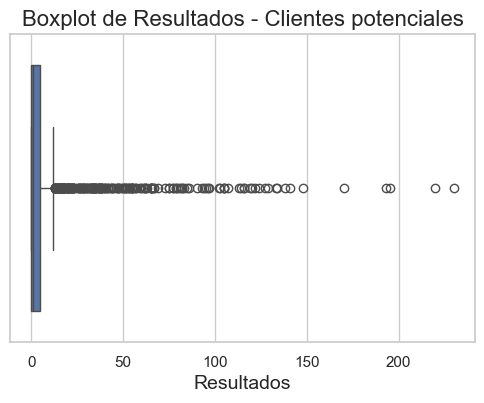

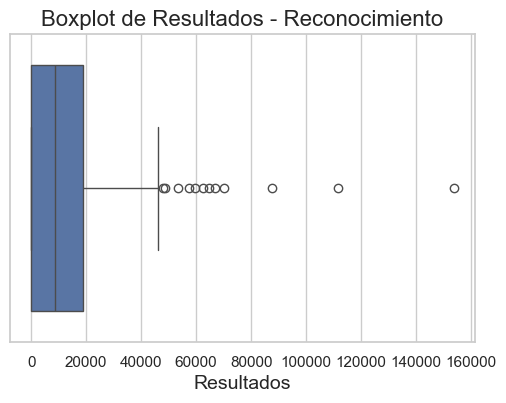

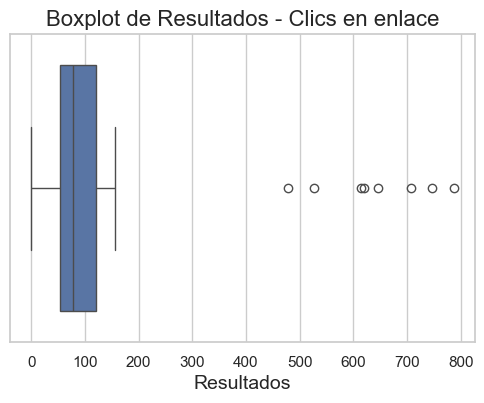

In [18]:
for objetivo, df in dfs1.items():
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df['Resultados'])
    plt.title(f"Boxplot de Resultados - {objetivo}")
    plt.xlabel("Resultados")
    plt.show()

En los boxplots de la variable **Resultados** se observan patrones diferenciados entre objetivos de campaña:

- **Leads:** el número de anuncios es muy superior, lo que genera una mayor densidad de puntos en el gráfico. 
La mediana es baja (<10 leads), pero existen anuncios excepcionales con más de 200 resultados. Esto refleja 
la dificultad del objetivo y la necesidad de lanzar muchos anuncios para que solo unos pocos destaquen.

- **Reconocimiento:** la escala de resultados es mucho mayor. La mayoría de anuncios generan decenas de miles 
de impresiones, y algunos outliers superan las 100.000. Este comportamiento es esperado, dado que se trata 
de un objetivo masivo y barato.

- **Clics en enlace:** se ubica en un punto intermedio. La mayoría de anuncios generan pocas decenas de clics, 
pero también hay casos atípicos con varios cientos.

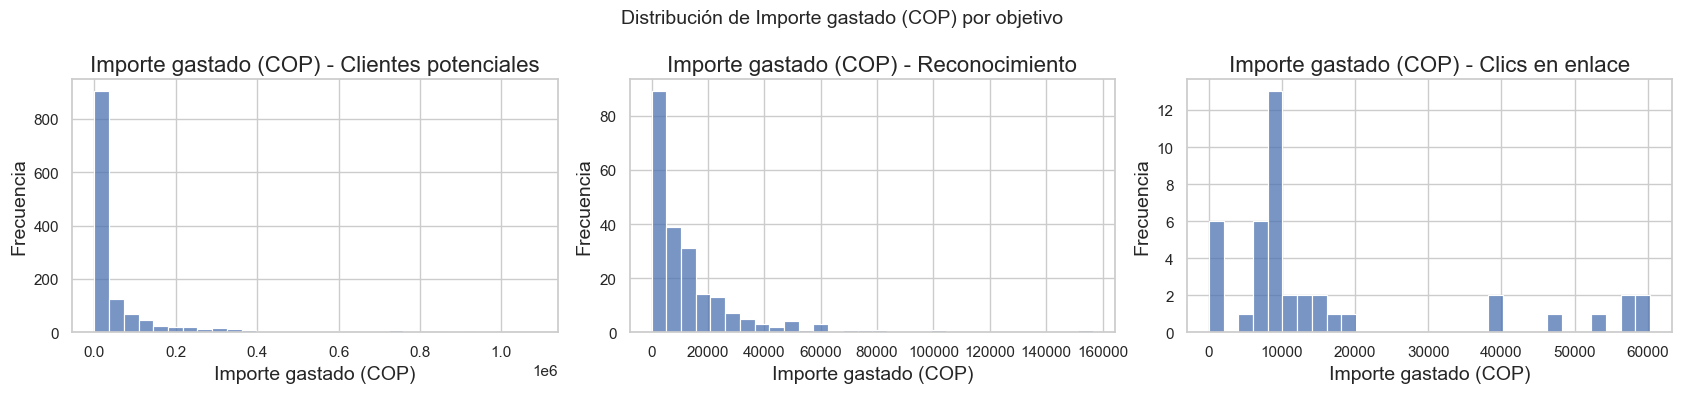

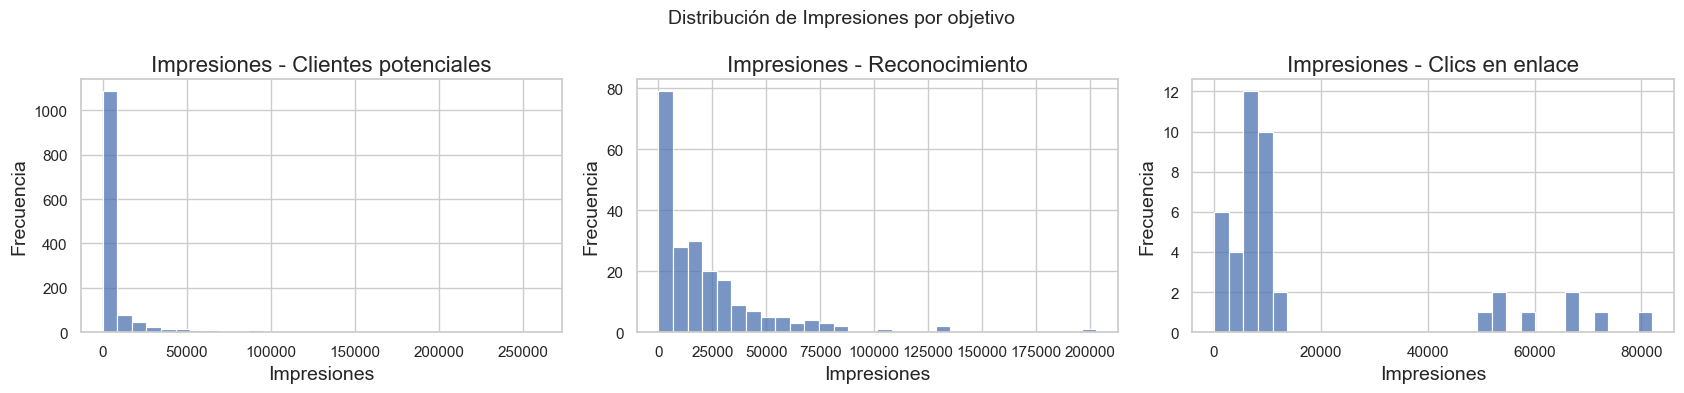

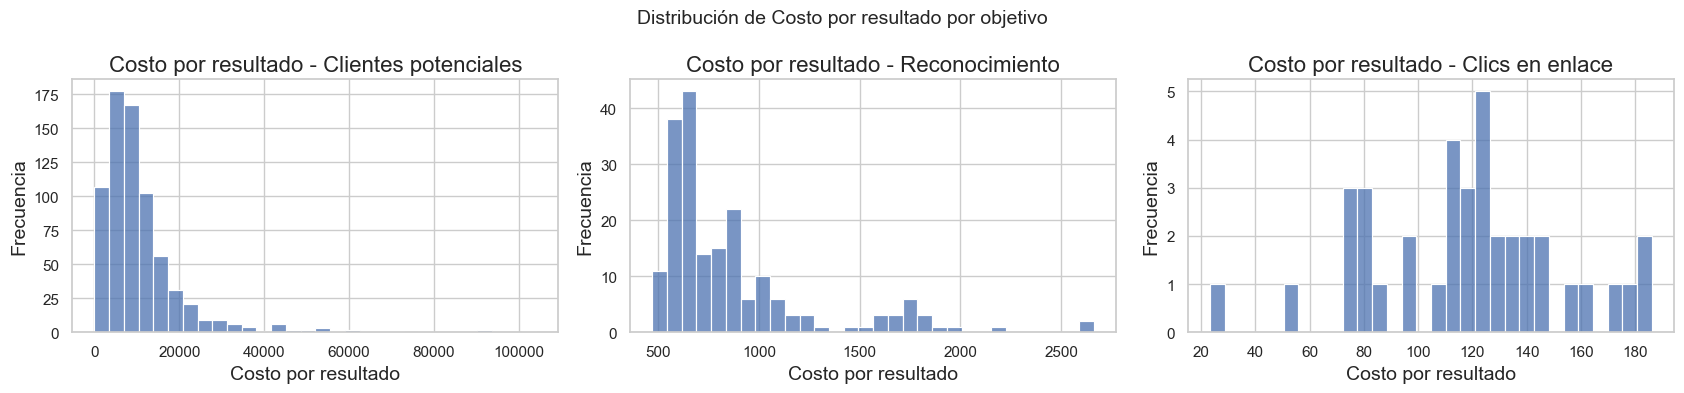

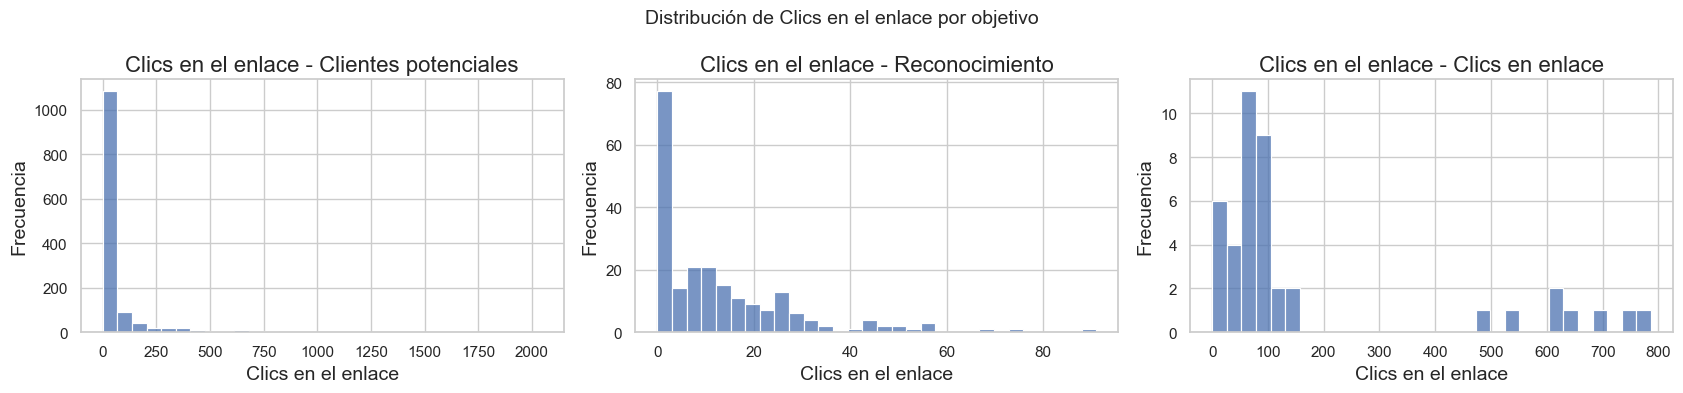

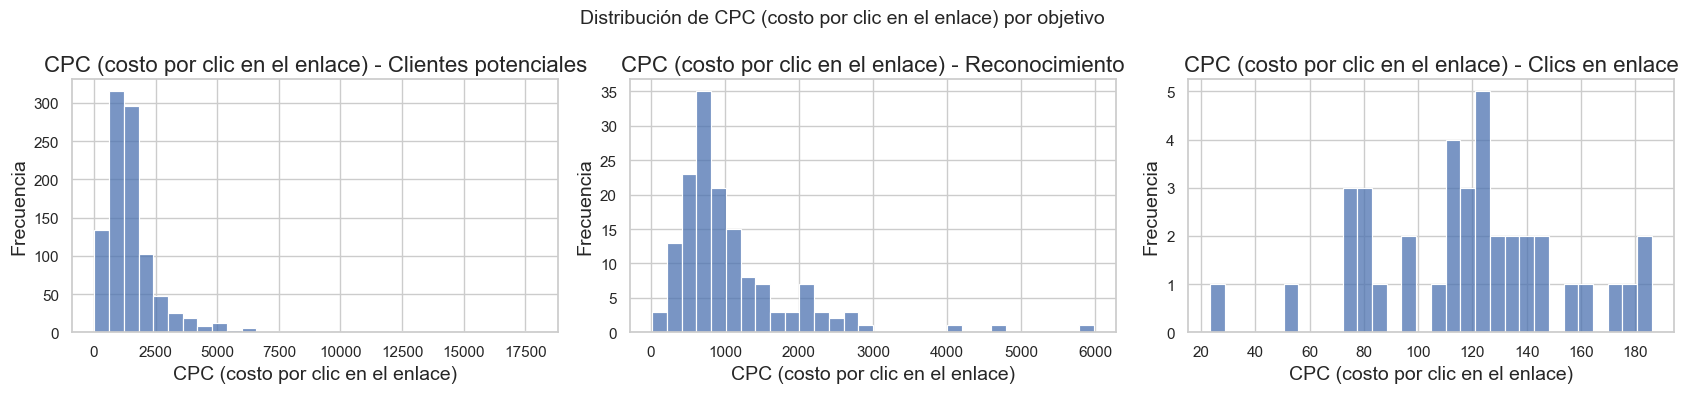

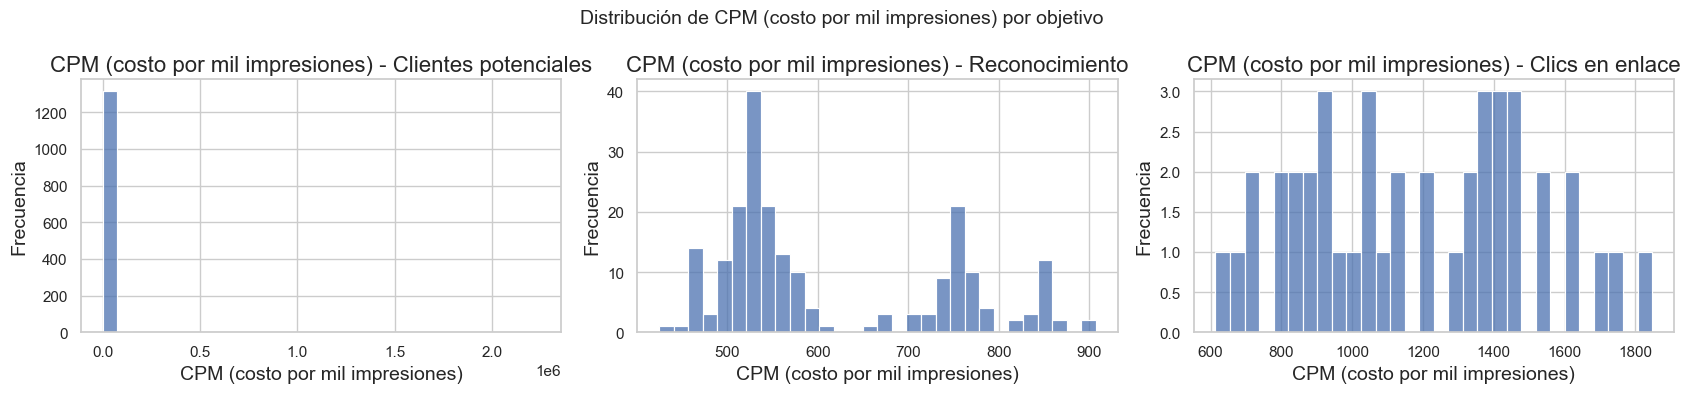

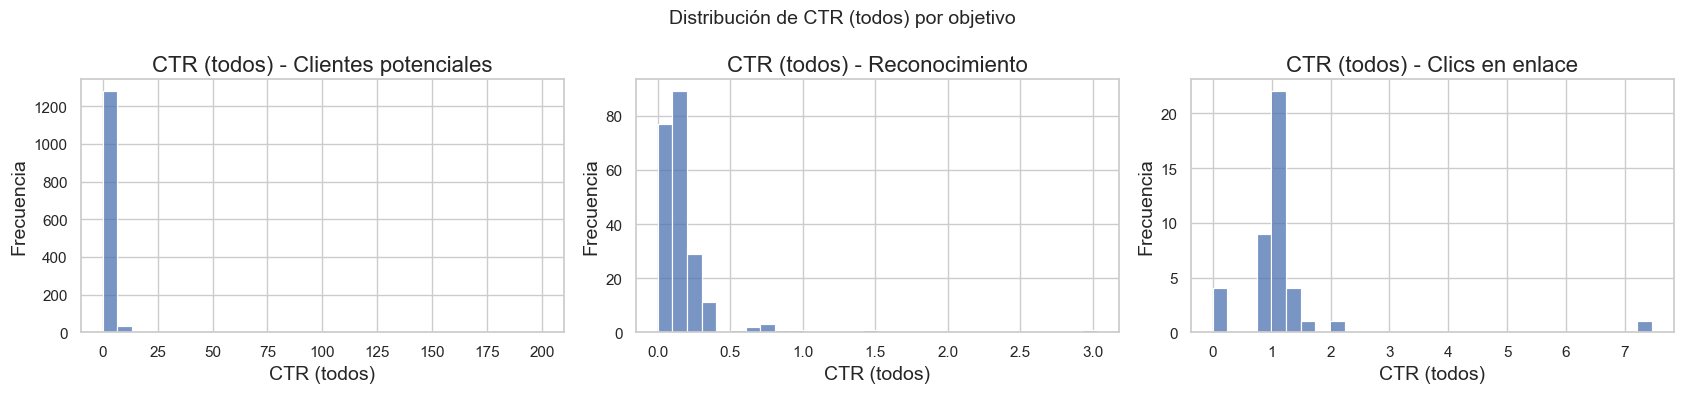

In [19]:
vars_numericas = [
    'Importe gastado (COP)',
    'Impresiones',
    'Costo por resultado',
    'Clics en el enlace',
    'CPC (costo por clic en el enlace)',
    'CPM (costo por mil impresiones)',
    'CTR (todos)'
]
for var in vars_numericas:
    fig, axes = plt.subplots(1, 3, figsize=(17,4)) 
    
    for i, (objetivo, df) in enumerate(dfs1.items()):
        sns.histplot(df[var], bins=30, kde=False, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}")
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Frecuencia")
    
    plt.suptitle(f"Distribución de {var} por objetivo", fontsize=14)
    plt.tight_layout()
    plt.show()

En el análisis de las métricas de costo (`Costo por resultado`, `CPC` y `CPM`) se observa que todas presentan 
distribuciones sesgadas positivamente, con la mayoría de los anuncios concentrados en valores bajos y la 
presencia de outliers con costos muy elevados.

Al segmentar por objetivo de campaña se evidencia un patrón claro:

- **Clientes potenciales (Leads):** los costos son consistentemente más altos. Esto se debe a que captar un lead 
es un objetivo mucho más complejo que simplemente mostrar un anuncio o lograr un clic, por lo que requiere 
una mayor inversión para obtener resultados. En algunos casos, el costo por lead supera los 50.000 COP.

- **Reconocimiento y Clics en enlace:** presenta los costos más bajos, ya que mostrar un anuncio a una 
audiencia amplia o que una persona haga clic en un enlace es mucho más barato que obtener acciones activas de los usuarios o llenado de formularios.

**Conclusión:** los objetivos de campaña más complejos (como Leads) tienden a ser más costosos, mientras que 
los más simples (Reconocimiento y Clics) requieren menor inversión. Este hallazgo es coherente con la 
naturaleza de los objetivos de Meta Ads.

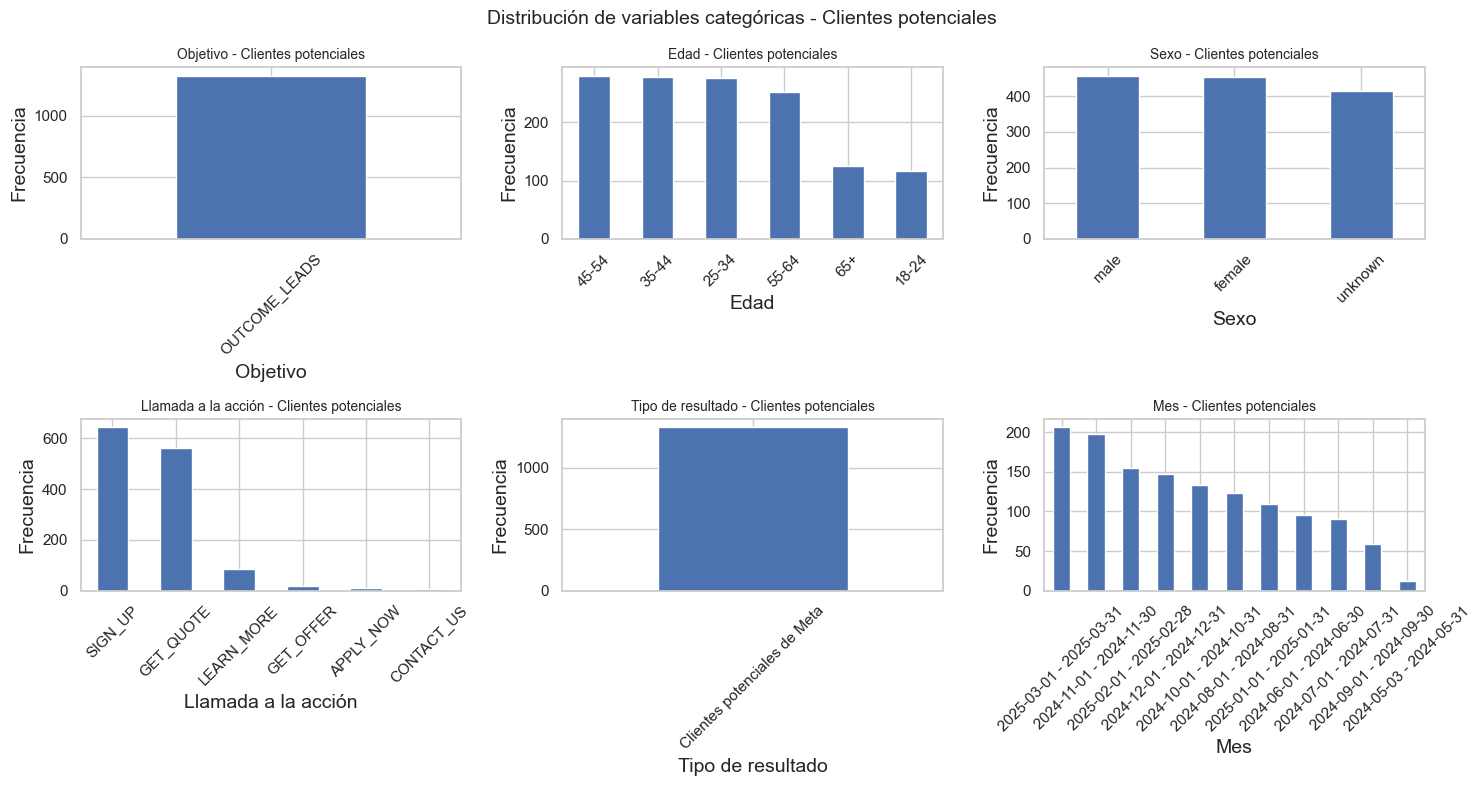

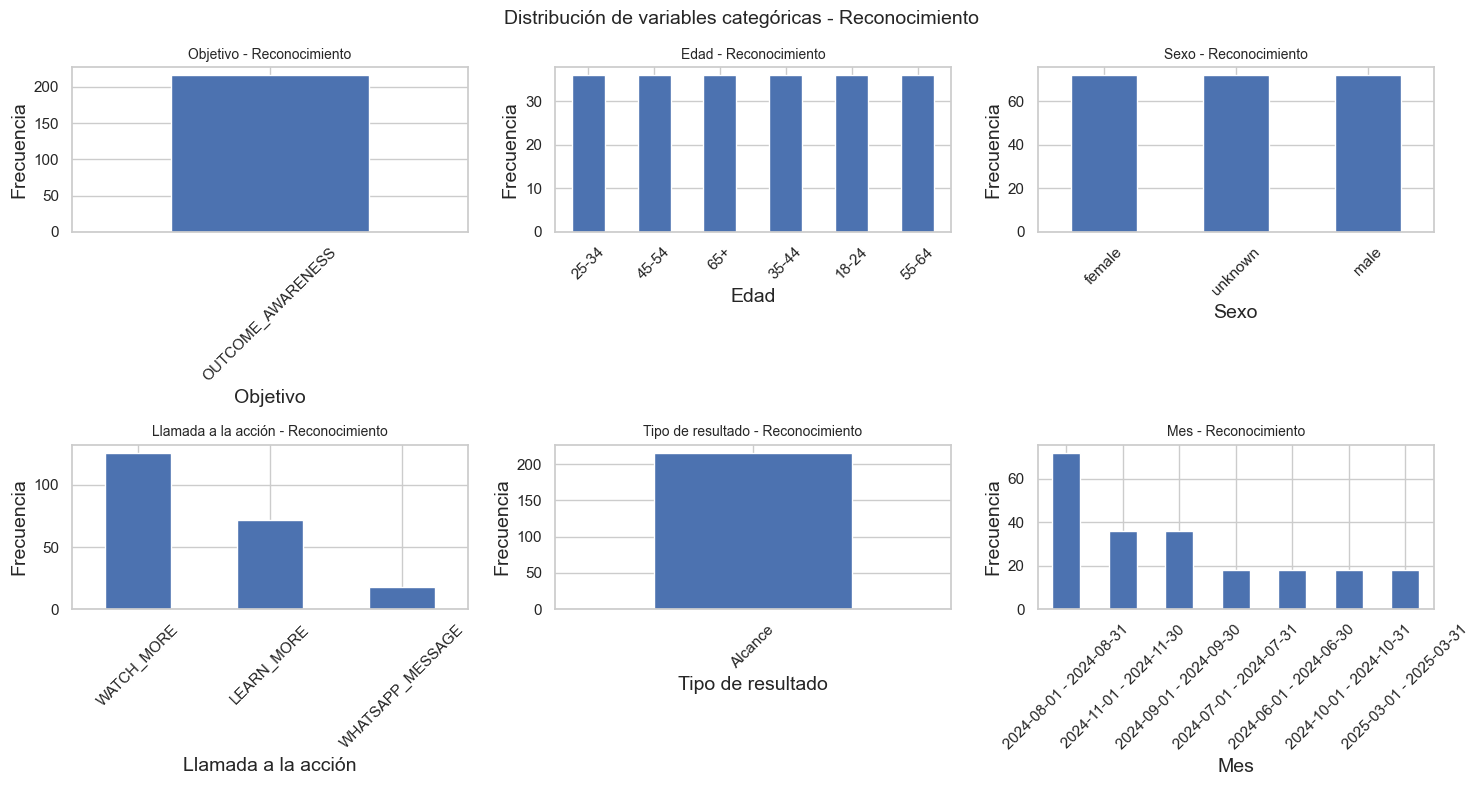

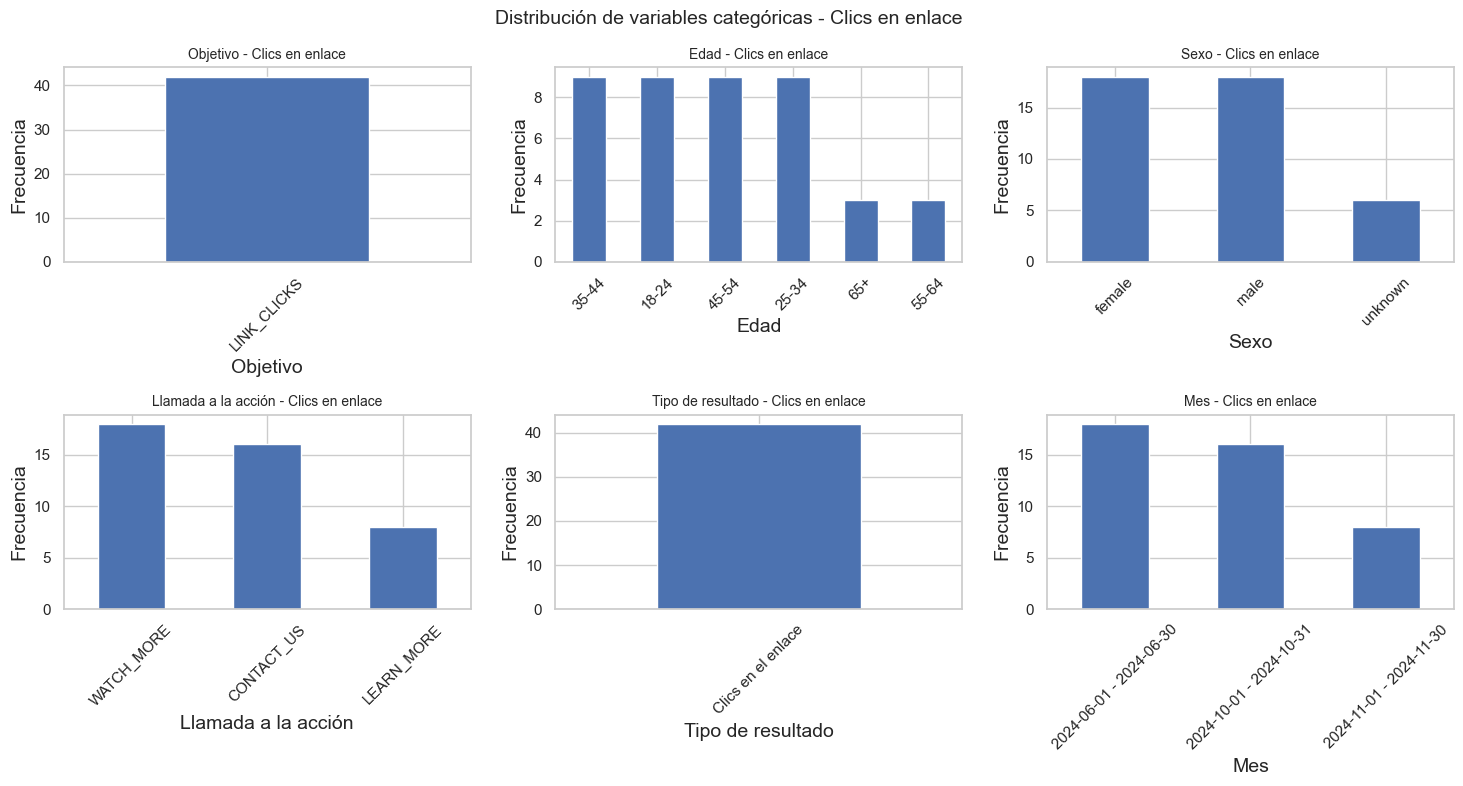

In [20]:
cols_cat = ['Objetivo','Edad','Sexo','Llamada a la acción','Tipo de resultado','Mes']
for objetivo, df in dfs1.items():
    n_cols = 3  
    n_rows = (len(cols_cat) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(cols_cat):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f"{col} - {objetivo}", fontsize=10)
        axes[i].set_ylabel("Frecuencia")
        axes[i].tick_params(axis='x', rotation=45)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle(f"Distribución de variables categóricas - {objetivo}", fontsize=14)
    plt.tight_layout()
    plt.show()

### Análisis univariado de variables categóricas

Al analizar las variables categóricas segmentadas por objetivo de campaña, se observan los siguientes hallazgos:

- **Objetivo y Tipo de resultado**  
  - La gran mayoría de anuncios está enfocada en **Clientes potenciales (Leads)**, lo cual es coherente con el sector inmobiliario, donde el principal interés es captar registros de usuarios interesados.  
  - Los objetivos de **Reconocimiento** y **Clics en enlace** tienen menor participación.  
  - Aunque también aparecen anuncios con objetivos de **Ventas** e **Interacción**, previamente se evidenció que no generaron resultados, por lo cual su aporte es nulo.  
  - Existe proporcionalidad directa entre el *Objetivo* y el *Tipo de resultado*, ya que ambos reflejan la misma lógica de configuración de campañas.

- **Edad**  
  - La pauta se concentra mayoritariamente en el rango de **25 a 54 años**, que corresponde al segmento objetivo más común en la compra de vivienda.  
  - Los extremos (18–24 y 65+) tienen presencia menor, lo cual refleja que se priorizan segmentos económicamente más activos.

- **Sexo**  
  - La distribución entre **hombres y mujeres** es bastante equilibrada.  
  - Aparece un valor “**unknown**” con una proporción considerable, lo que indica que Meta Ads no siempre logra asignar el género de los usuarios alcanzados o que algunas campañas se configuraron sin restricción de sexo. Este hallazgo debe documentarse, ya que puede generar sesgos en futuros modelos.

- **Llamada a la acción (CTA)**  
  - En campañas de **Leads**, predominan las acciones **SIGN_UP**, **GET_QUOTE** y **WHATSAPP_MESSAGE**, todas orientadas a captación de clientes.  
  - En **Reconocimiento** y **Clics en enlace**, se destacan CTAs como **WATCH_MORE** y **LEARN_MORE**, más vinculadas al consumo de contenido que a la conversión.  
  - Este patrón evidencia que el uso de las llamadas a la acción está alineado con el objetivo principal de cada campaña.

- **Mes**  
  - Los anuncios se distribuyen en distintos periodos desde 2024 hasta 2025, aunque con cierta irregularidad.  
  - Un hallazgo importante es que, tras filtrar los objetivos de Ventas e Interacción, la última fecha con anuncios activos corresponde a **marzo de 2025**, a pesar de que el archivo fue exportado en agosto de 2025.  
  - Esto genera una inconsistencia, pues en la práctica sí existían campañas de Leads activas después de marzo 2025. El comportamiento puede deberse a un error en la exportación de Meta Ads o a la forma en que se asignan las fechas a cada anuncio.  

## Análisis Bivariado y correlaciones entre variables

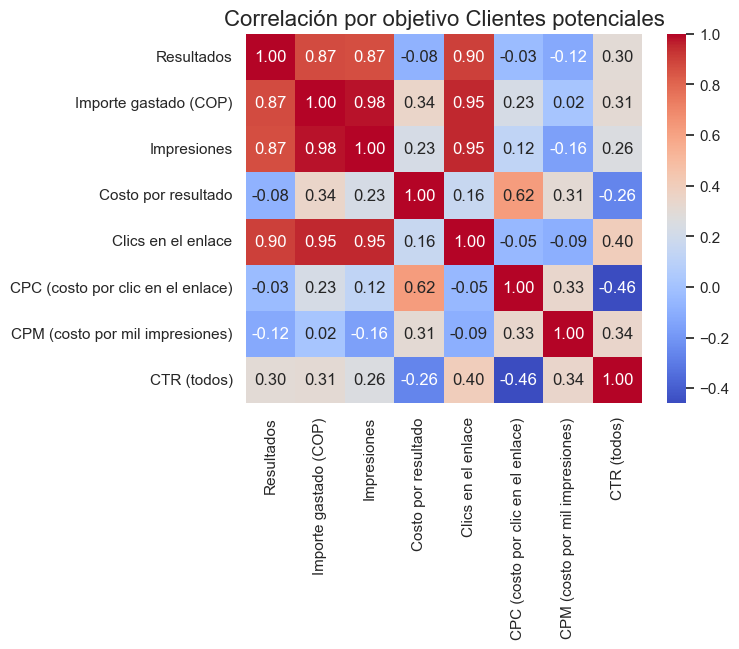

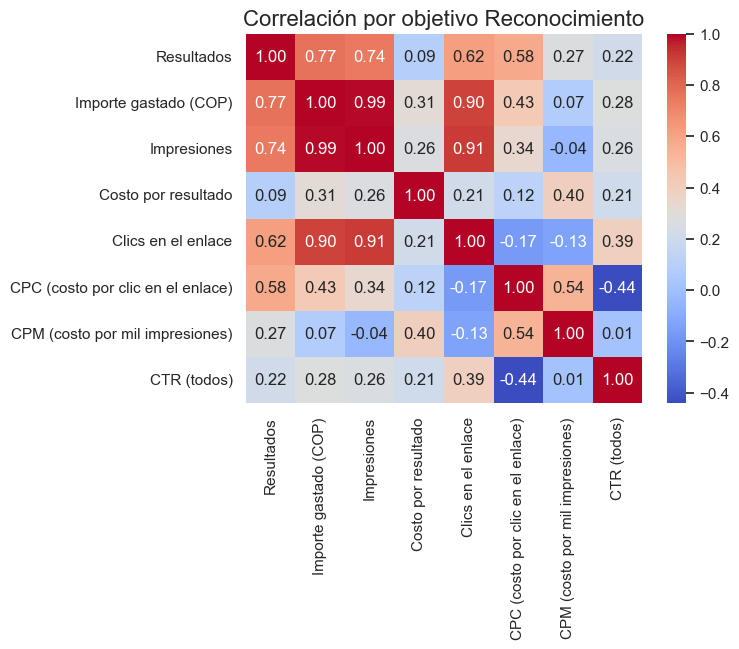

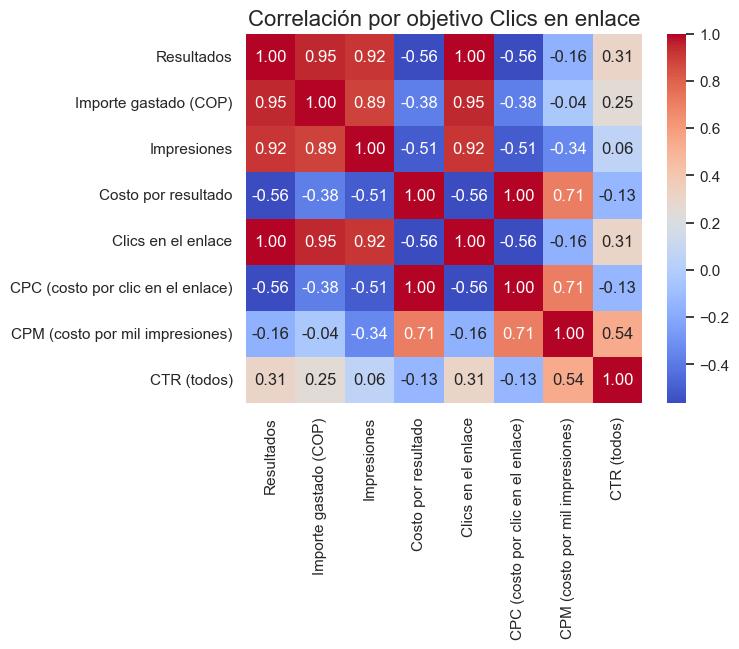

In [21]:
vars_numericas1 = [
    'Resultados',
    'Importe gastado (COP)',
    'Impresiones',
    'Costo por resultado',
    'Clics en el enlace',
    'CPC (costo por clic en el enlace)',
    'CPM (costo por mil impresiones)',
    'CTR (todos)'
]
for objetivo, df in dfs1.items():
    sns.heatmap(df[vars_numericas1].corr(method='spearman'),annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f'Correlación por objetivo {objetivo}')
    plt.show()

## Análisis de correlaciones por objetivo
1. Clientes potenciales (Leads)  
- **Variables más relacionadas con Resultados:**
  - Importe gastado (0.87)
  - Impresiones (0.87)
  - Clics en el enlace (0.90)  
- **Variables poco relacionadas:**
  - Costo por resultado (-0.08)  
- **Observación clave:**  
  Existe **multicolinealidad muy alta** entre *importe gastado*, *impresiones* y *clics en el enlace* (correlaciones >0.95), por lo que aportan información redundante.

2. Reconocimiento  
- **Variables más relacionadas con Resultados:**
  - Importe gastado (0.77)
  - Impresiones (0.74)
  - Clics en el enlace (0.62)  
- **Variables poco relacionadas:**
  - CTR (0.22)
  - CPM (0.27)  
- **Observación clave:**  
  Las correlaciones son más moderadas que en leads. Las métricas de eficiencia (CTR, CPM) no explican directamente los resultados.


3. Clics en el enlace  
- **Variables más relacionadas con Resultados:**
  - Clics en el enlace (1.00)
  - Importe gastado (0.95)
  - Impresiones (0.92)  
- **Variables poco relacionadas:**
  - CPM (-0.16)
  - CTR (0.31)  
- **Observación clave:**  
  El **costo por resultado** tiene correlación negativa fuerte (-0.56): a más clics, menor costo unitario.  
  El CPM y CPC están positivamente correlacionados entre sí (0.71), reflejando consistencia en costos.

In [22]:
kruskal_results = []

for objetivo, df in dfs1.items():
    for col in cols_cat:
        
        grupos = [df[df[col] == categoria]['Resultados'].dropna() 
                  for categoria in df[col].unique()]

        
        if len([g for g in grupos if len(g) > 0]) > 1:
            stat, p = kruskal(*grupos)
            kruskal_results.append([objetivo, col, stat, p])
        else:
            kruskal_results.append([objetivo, col, None, None])

kruskal_df = pd.DataFrame(kruskal_results, 
                          columns=['Objetivo', 'Variable', 'H', 'p-value'])

kruskal_df = kruskal_df.sort_values(by=['Objetivo', 'p-value'])
kruskal_df

,Objetivo,Variable,H,p-value
17,Clics en enlace,Mes,19.007773,7.456148e-05
14,Clics en enlace,Sexo,15.419088,4.485260e-04
15,Clics en enlace,Llamada a la acción,4.473457,1.068074e-01
13,Clics en enlace,Edad,0.825191,9.753989e-01
12,Clics en enlace,Objetivo,NaN,NaN
16,Clics en enlace,Tipo de resultado,NaN,NaN
2,Clientes potenciales,Sexo,355.806496,5.465139e-78
1,Clientes potenciales,Edad,83.068009,1.912356e-16
5,Clientes potenciales,Mes,53.055322,7.271875e-08
3,Clientes potenciales,Llamada a la acción,39.993982,1.497547e-07


In [23]:
vars_por_objetivo = {
    "Clientes potenciales": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace"
        ],
        "categoricas": [
            "Sexo",     
            "Edad",     
            "Mes",      
            "Llamada a la acción"  
        ]
    },

    "Reconocimiento": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace"
        ],
        "categoricas": [
            "Sexo",     
            "Llamada a la acción", 
            "Mes",      
            "Edad"      
        ]
    },

    "Clics en enlace": {
        "numericas": [
            "Importe gastado (COP)", 
            "Impresiones", 
            "Clics en el enlace", 
        ],
        "categoricas": [
            "Mes",     
            "Sexo",     
        ]
    }
}

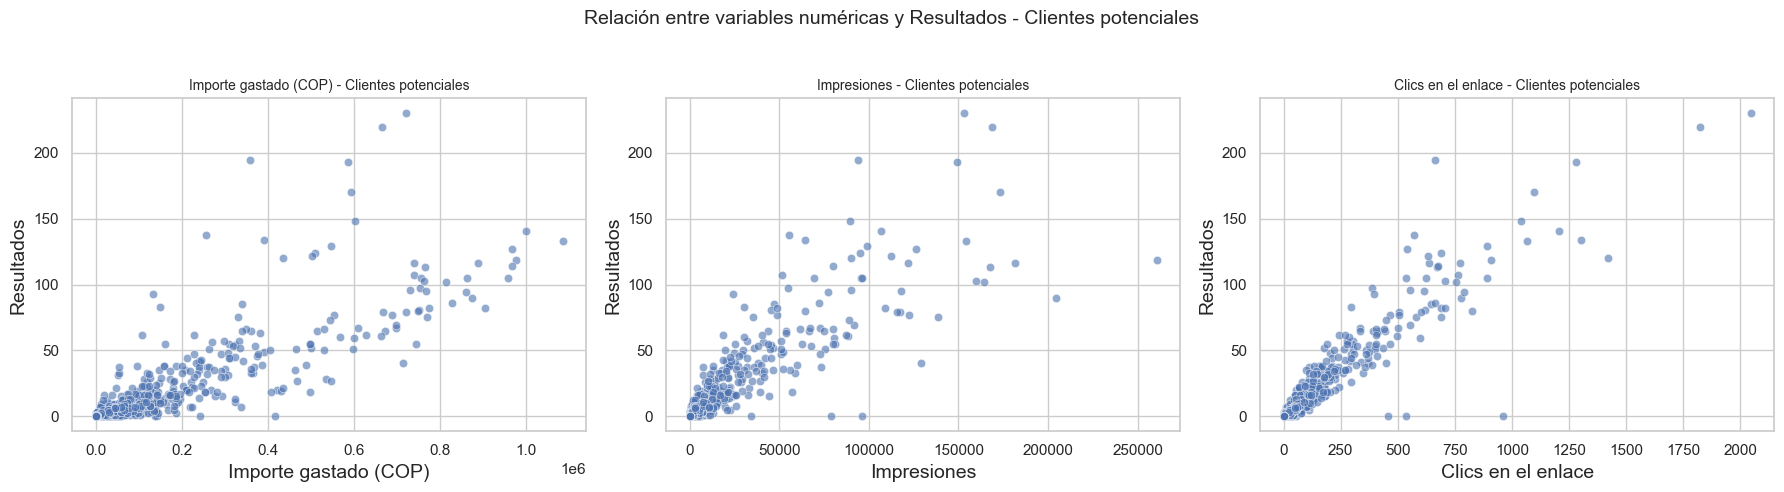

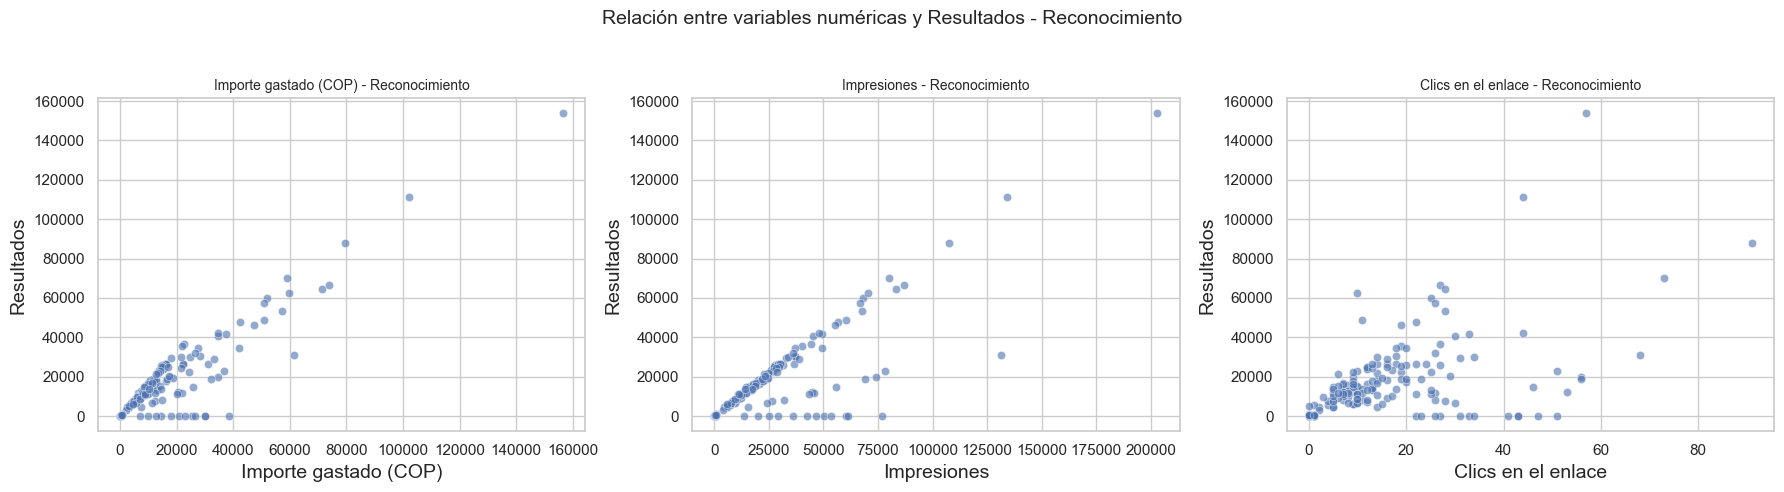

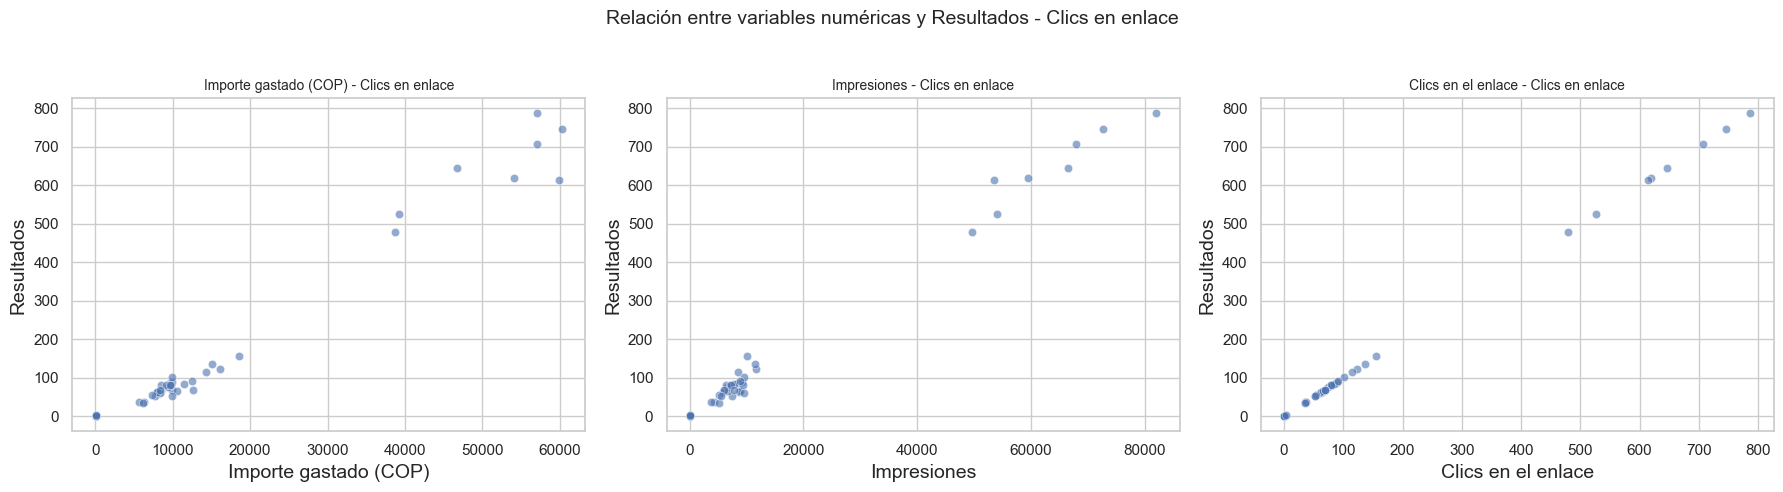

In [24]:
for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo]
    
    # Definir número de variables numéricas
    num_vars = vars_dict["numericas"]
    n = len(num_vars)
    
    # Crear subplots (1 fila, n columnas)
    fig, axes = plt.subplots(1, n, figsize=(6*n, 5))
    
    for i, var in enumerate(num_vars):
        sns.scatterplot(x=df[var], y=df["Resultados"], alpha=0.6, ax=axes[i])
        axes[i].set_title(f"{var} - {objetivo}", fontsize=10)
        axes[i].set_xlabel(var)
        axes[i].set_ylabel("Resultados")
    
    fig.suptitle(f"Relación entre variables numéricas y Resultados - {objetivo}", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

## Análisis bivariado de variables numéricas y *Resultados*

Al evaluar la relación entre las variables numéricas y la variable *Resultados* mediante diagramas de dispersión, se confirma lo observado previamente en los heatmaps de correlación:

- En los tres objetivos (**Clientes potenciales, Reconocimiento y Clics en enlace**), existe una **relación positiva muy fuerte** entre *Importe gastado (COP)*, *Impresiones*, *Clics en el enlace* y los *Resultados*.  
- Los gráficos muestran una tendencia prácticamente lineal: a mayor inversión o mayor número de impresiones, los resultados tienden a incrementarse.  
- Aunque se observan algunos **outliers**, la tendencia general es clara y consistente, validando que estas variables son los principales impulsores de los resultados en las campañas.  

En conclusión, las variables numéricas confirman su **relevancia directa en el desempeño de las campañas**, siendo indicadores clave para explicar y predecir los resultados.  


===== Clientes potenciales =====


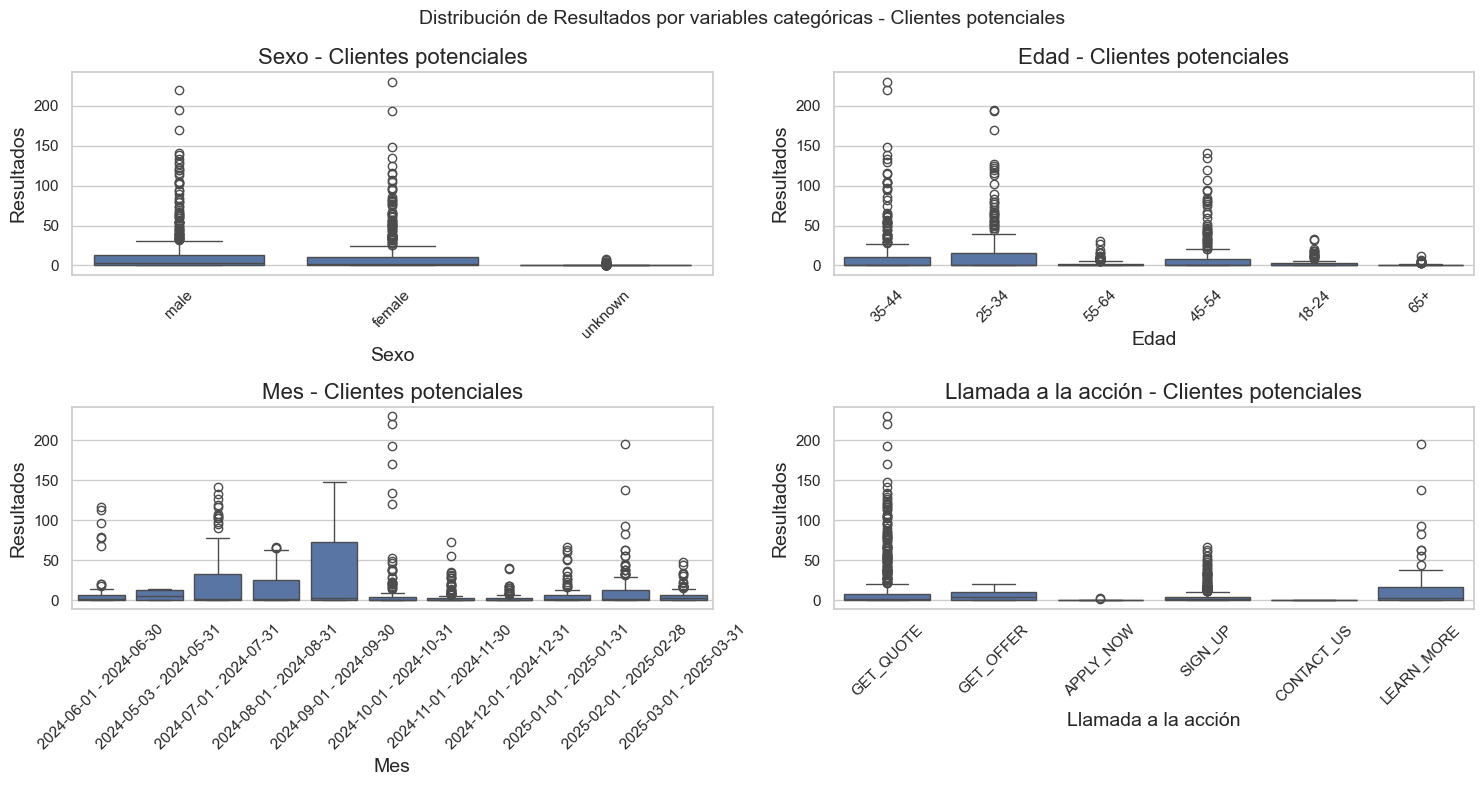

===== Reconocimiento =====


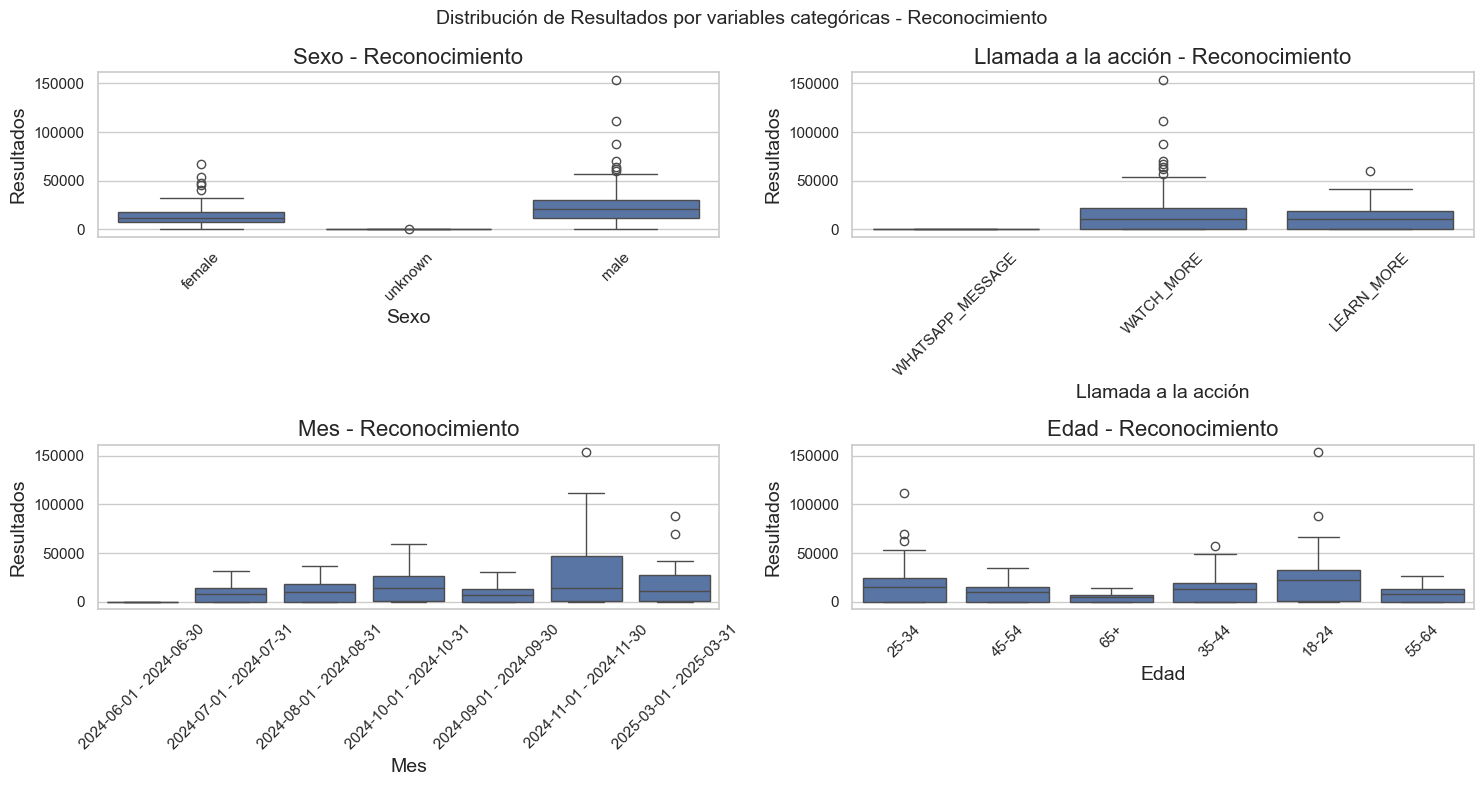

===== Clics en enlace =====


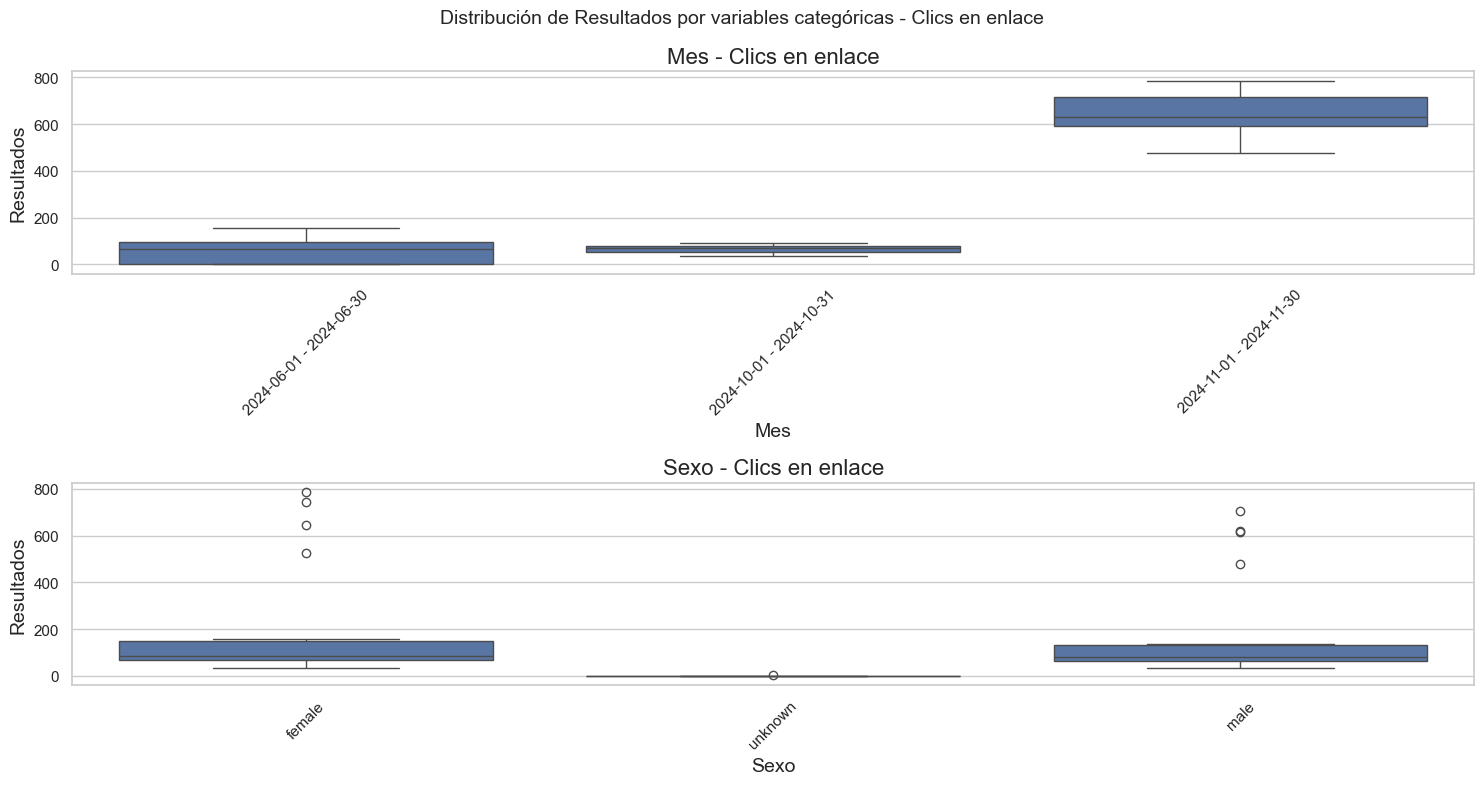

In [25]:
for objetivo, vars_dict in vars_por_objetivo.items():
    df = dfs1[objetivo] 
    
    print(f"===== {objetivo} =====")
    cat_vars = vars_dict["categoricas"]
    fig, axes = plt.subplots(2, (len(cat_vars)+1)//2, figsize=(15, 8))
    axes = axes.flatten()
    for i, col in enumerate(cat_vars):
        sns.boxplot(x=col, y="Resultados", data=df, ax=axes[i])
        axes[i].set_title(f"{col} - {objetivo}")
        axes[i].set_xlabel(col)
        axes[i].set_ylabel("Resultados")
        axes[i].tick_params(axis="x", rotation=45)
    plt.suptitle(f"Distribución de Resultados por variables categóricas - {objetivo}", fontsize=14)
    plt.tight_layout()
    plt.show()

## Análisis bivariado de variables categóricas y *Resultados*

Al relacionar las variables categóricas con los *Resultados*, se identifican patrones diferenciales según cada objetivo:

- **Clientes potenciales**:  
  - **Sexo**: hombres y mujeres presentan comportamientos similares, mientras que *unknown* tiene un aporte prácticamente nulo.  
  - **Edad**: los grupos de **25–44 años** concentran la mayoría de los resultados, mientras que los extremos (18–24 y 65+) muestran un bajo rendimiento.  
  - **Mes**: se observan variaciones estacionales con picos destacados en ciertos meses (ej. agosto 2024).  
  - **Llamada a la acción**: *GET_QUOTE* y *LEARN_MORE* destacan como los más efectivos frente a otros botones.  

- **Reconocimiento**:  
  - **Sexo**: resultados relativamente equilibrados, con ligera ventaja en hombres.  
  - **Edad**: los mejores desempeños provienen de públicos jóvenes (**18–34 años**).  
  - **Llamada a la acción**: destacan *WATCH_MORE* y *LEARN_MORE* sobre *WHATSAPP_MESSAGE*.  
  - **Mes**: se identifican meses con mayor concentración de resultados, lo que sugiere efectos estacionales.  

- **Clics en enlace**:  
  - **Edad y sexo**: sin diferencias marcadas, aunque con ligeras ventajas en públicos jóvenes y en mujeres.  
  - **Mes**: algunos periodos específicos concentran gran parte de los clics, señalando momentos más efectivos para pautar.  

En conclusión, las variables categóricas aportan información clave para la **segmentación estratégica**, permitiendo identificar los grupos de edad, sexos, meses y llamadas a la acción más efectivos para maximizar los resultados.

# Limpieza de datos

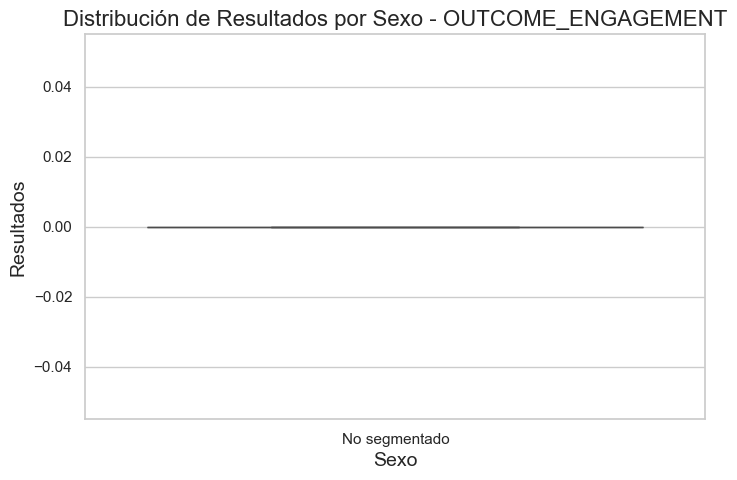

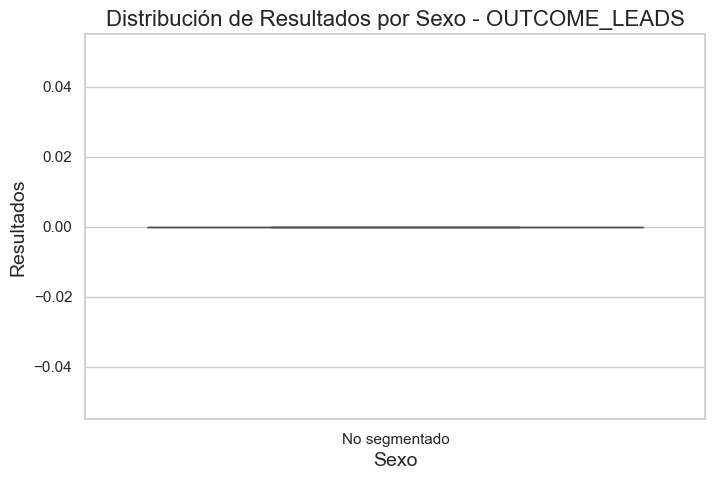

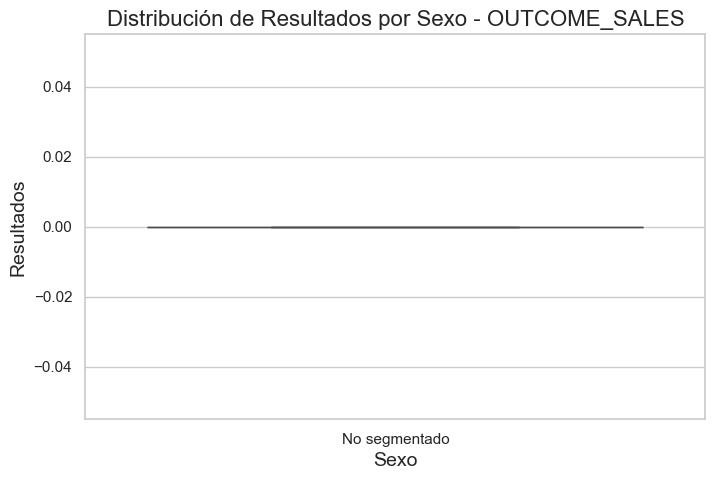

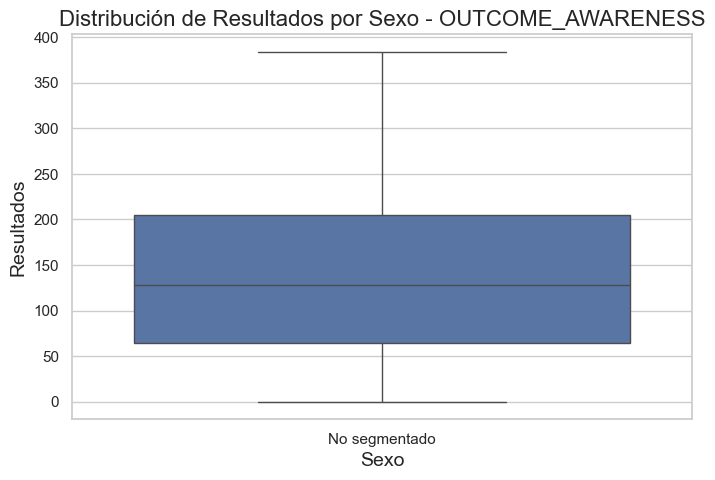

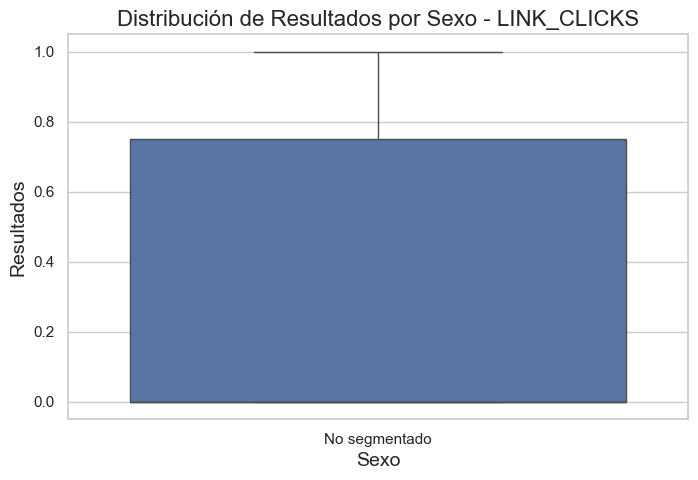

In [37]:
objetivos = df_meta['Objetivo'].unique()

for obj in objetivos:
    plt.figure(figsize=(8,5))
    sns.boxplot(x="Sexo", y="Resultados", data=df_meta[df_meta['Objetivo'] == obj], showfliers=False)
    plt.title(f"Distribución de Resultados por Sexo - {obj}")
    plt.ylabel("Resultados")
    plt.xlabel("Sexo")
    plt.show()

In [35]:
# Filtrar registros con sexo = No segmentado y resultados > 0
no_segmentado_resultados = df_meta[(df_meta['Sexo'] == "No segmentado") & (df_meta['Resultados'] > 0)]

# Ver los primeros registros encontrados
no_segmentado_resultados.head()

,Nombre de la campaña,Identificador de la campaña,Nombre del conjunto de anuncios,Identificador del conjunto de anuncios,Nombre del anuncio,Identificador del anuncio,Mes,Objetivo,Edad,Sexo,Llamada a la acción,Tipo de resultado,Resultados,Importe gastado (COP),Impresiones,Costo por resultado,Clics en el enlace,CPC (costo por clic en el enlace),CPM (costo por mil impresiones),CTR (todos),Inicio del informe,Fin del informe
34,Formulario clientes potenciales Xiudad - 20 ma...,120209370901650362,Formulario clientes potenciales Xiudad - 20 ma...,120209370902050362,Formulario clientes potenciales Xiudad - 20 ma...,120209370902340362,2024-06-01 - 2024-06-30,OUTCOME_LEADS,35-44,No segmentado,GET_QUOTE,Clientes potenciales de Meta,4.0,11921,1307,2980.250000,11.0,1083.727273,9120.887529,1.530222,2024-06-01,2024-06-30
37,Formulario clientes potenciales Xiudad - 20 ma...,120209370901650362,Formulario clientes potenciales Xiudad - 20 ma...,120209370902050362,Formulario clientes potenciales Xiudad - 20 ma...,120209370902340362,2024-06-01 - 2024-06-30,OUTCOME_LEADS,45-54,No segmentado,GET_QUOTE,Clientes potenciales de Meta,3.0,9176,929,3058.666667,3.0,3058.666667,9877.287406,0.861141,2024-06-01,2024-06-30
241,formulario Xiudad - 12 Junio - clientes potenc...,120209709599970362,formulario Xiudad - 12 Junio - clientes potenc...,120209709600650362,formulario Xiudad - 12 Junio - clientes potenc...,120209709600770362,2024-06-01 - 2024-06-30,OUTCOME_LEADS,35-44,No segmentado,GET_OFFER,Clientes potenciales de Meta,1.0,4309,249,4309.000000,1.0,4309.000000,17305.220884,1.606426,2024-06-01,2024-06-30
344,ESPEJO TRÁFICO WEB 13 JUNIO,120209966217950362,ESPEJO TRÁFICO WEB 13 JUNIO,120209966218050362,ESPEJO TRÁFICO WEB 13 JUNIO,120209966218130362,2024-06-01 - 2024-06-30,LINK_CLICKS,35-44,No segmentado,WATCH_MORE,Clics en el enlace,1.0,54,88,54.000000,1.0,54.000000,613.636364,1.136364,2024-06-01,2024-06-30
351,ESPEJO TRÁFICO WEB 13 JUNIO,120209966217950362,ESPEJO TRÁFICO WEB 13 JUNIO,120209966218050362,ESPEJO TRÁFICO WEB 13 JUNIO,120209966218130362,2024-06-01 - 2024-06-30,LINK_CLICKS,18-24,No segmentado,WATCH_MORE,Clics en el enlace,3.0,70,67,23.333333,3.0,23.333333,1044.776119,7.462687,2024-06-01,2024-06-30


In [39]:
df_meta.groupby(['Objetivo','Sexo'])['Resultados'].count()

Objetivo            Sexo         
LINK_CLICKS         No segmentado      6
OUTCOME_AWARENESS   No segmentado     72
OUTCOME_ENGAGEMENT  No segmentado     76
OUTCOME_LEADS       No segmentado    414
OUTCOME_SALES       No segmentado    116
Name: Resultados, dtype: int64